##### This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

In [1]:
# Importing main Libiraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Loading the Dataset

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
# showing first five rows 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# showing Last five rows
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
#showing No of rows in df
len(df)

50

## Clean data - Feature Engineering

In [6]:
# First we can check our data info by using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# We can check columns no
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
for i in df.columns:
    print(i)

R&D Spend
Administration
Marketing Spend
State
Profit


In [9]:
# Chacking state columns
df["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
dummies=pd.get_dummies(df.State,dtype="int64")

In [12]:
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [13]:
merged=pd.concat([df,dummies],axis="columns")

In [14]:
merged.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [15]:
# Dropping state columns by using drop method
new_df=merged.drop("State",axis="columns")

In [16]:
new_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Creating a Multiple Linear Regression Model

## Data Prepration

In [17]:
# first we prepare the data in the form of X= Independent variables(Features), y= Dependent variables(Target)

X=new_df.drop("Profit",axis="columns")
y=new_df.Profit

In [18]:
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [19]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Splitting the data set

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Model Creation

In [21]:
model=LinearRegression()

## Model Training

In [22]:
model.fit(X.values,y.values)

LinearRegression()

## Model Prediction

In [23]:
# our model is ready to predict y.
y_predict =model.predict(X_test)

In [24]:
y_predict[:10]

array([101818.58738693, 135528.60078159, 135664.64259063,  74956.31104907,
       182276.18673283, 114279.80403012,  69606.52160902,  97617.29632021,
       114833.30513844, 172277.13381666])

## Find Model Acuracy : Evaluating the performance¶

In [25]:
y_test[:10]

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [26]:
# find evaluating the performance

In [27]:
r_squared = r2_score(y_test, y_predict)
r_squared

0.9517628037866713

### R2 score -> 0.95 which is very near to 1 thus showing that the model used is very good model

<Axes: xlabel='Profit', ylabel='Density'>

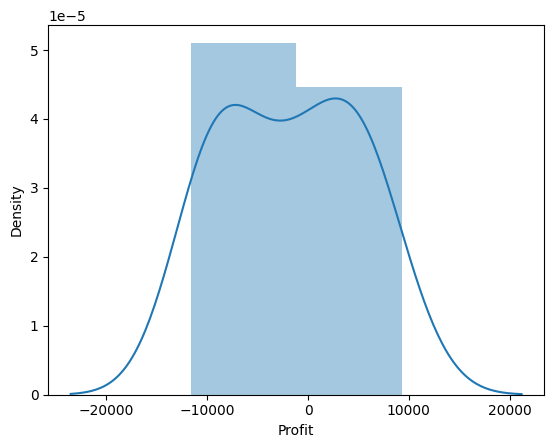

In [28]:
sns.distplot(y_predict - y_test)